# Customer Segmentation using Two Clustering Methods
Segmentating customers using unsupervised machine learning techniques in R with Kaggle dataset - [Mall Customer Segmentation Data][id].

[id]: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python "dataset"

## Overview
In this post, I will use two unsupervised machine learning algorithms, K-Means and DBScan to cluster mall customers, in turn, give data-driven business strategies to the marketing team.

## Introduction
Clustering is one of the most popular unsupervised machine learning techniques. The task of clustering is to segregate groups with similar features and assign them into clusters. The data can be divided on the basis of centroids (K-Means), densities (DBScan), etc. Below, I will apply K-Means and DBScan these two clustering methods to find customer segments in the mall.

## Dataset Overview
The "Mall_Customers" dataset, downloaded from Kaggle, has 200 observations of 5 variables. It contained basic data about mall customers, including customer ID, age, gender, annual income, and spending score. To explain "spending score", the mall gave a score to every customer based on the way they spend and their behavior. That is, a customer who spends more and has good behavior has a higher score.

In [54]:
# Load library
library(ggplot2)
library(ggpubr)
library(corrplot)
library(factoextra)
library(scatterplot3d)
library(dbscan)
library(fpc)

In [55]:
# Load data
df <- read.csv(file = '/Users/yuki0416/Desktop/Q2-Spring/Intermediate Analytics/Week 4/Assignment/Mall_Customers.csv', header = TRUE)

In [56]:
dim(df)

[1] 200   5

In [57]:
head(df, 5)

,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<fct>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40


## Exploratory Data Analysis
### 1. Univariate Analysis
#### a) Categorical Variable

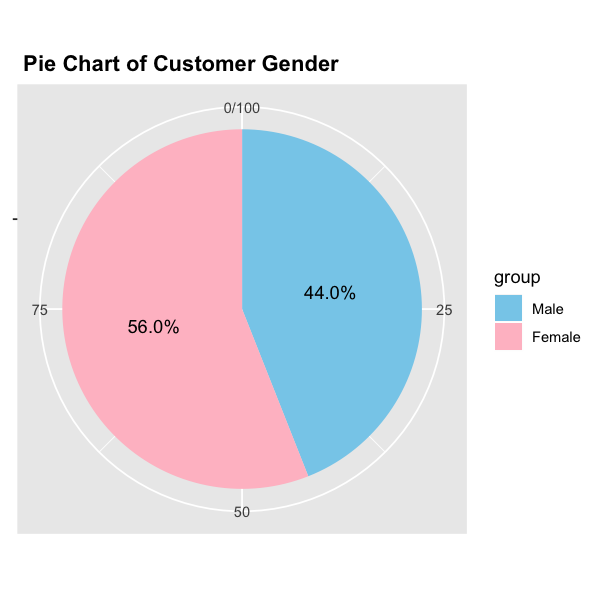

In [58]:
# Create gender data frame
male <- sum(df$Gender=="Male") 
female <- sum(df$Gender=="Female") 
slices <- c(male, female) # create slices of pie
pct <- (slices/sum(slices)*100) # calculate % of slices
gender_df <- data.frame(group = c("Male","Female"),value = c(pct))

# Pie of gender
options(repr.plot.width = 5, repr.plot.height = 5)
gender_pie <- ggplot(gender_df, aes(x="", y=value, fill=group)) + 
  geom_bar(width = 1, stat = "identity") + coord_polar("y", start=0) + # create pie
  geom_text(aes(label=sprintf("%.1f%%",value)), position = position_stack(vjust = 0.5)) + # put data labels
  scale_fill_manual(values=c("pink","sky blue"),breaks=c("Male","Female")) + # change fill color and legend order
  labs(x = NULL, y = NULL, title = " Pie Chart of Customer Gender") + # put main title
  theme(plot.title = element_text(face="bold")) # bold title
gender_pie

From the pie, we can tell that in the mall, there are more female customers than male customers. <br />
#### b) Numerical Variables

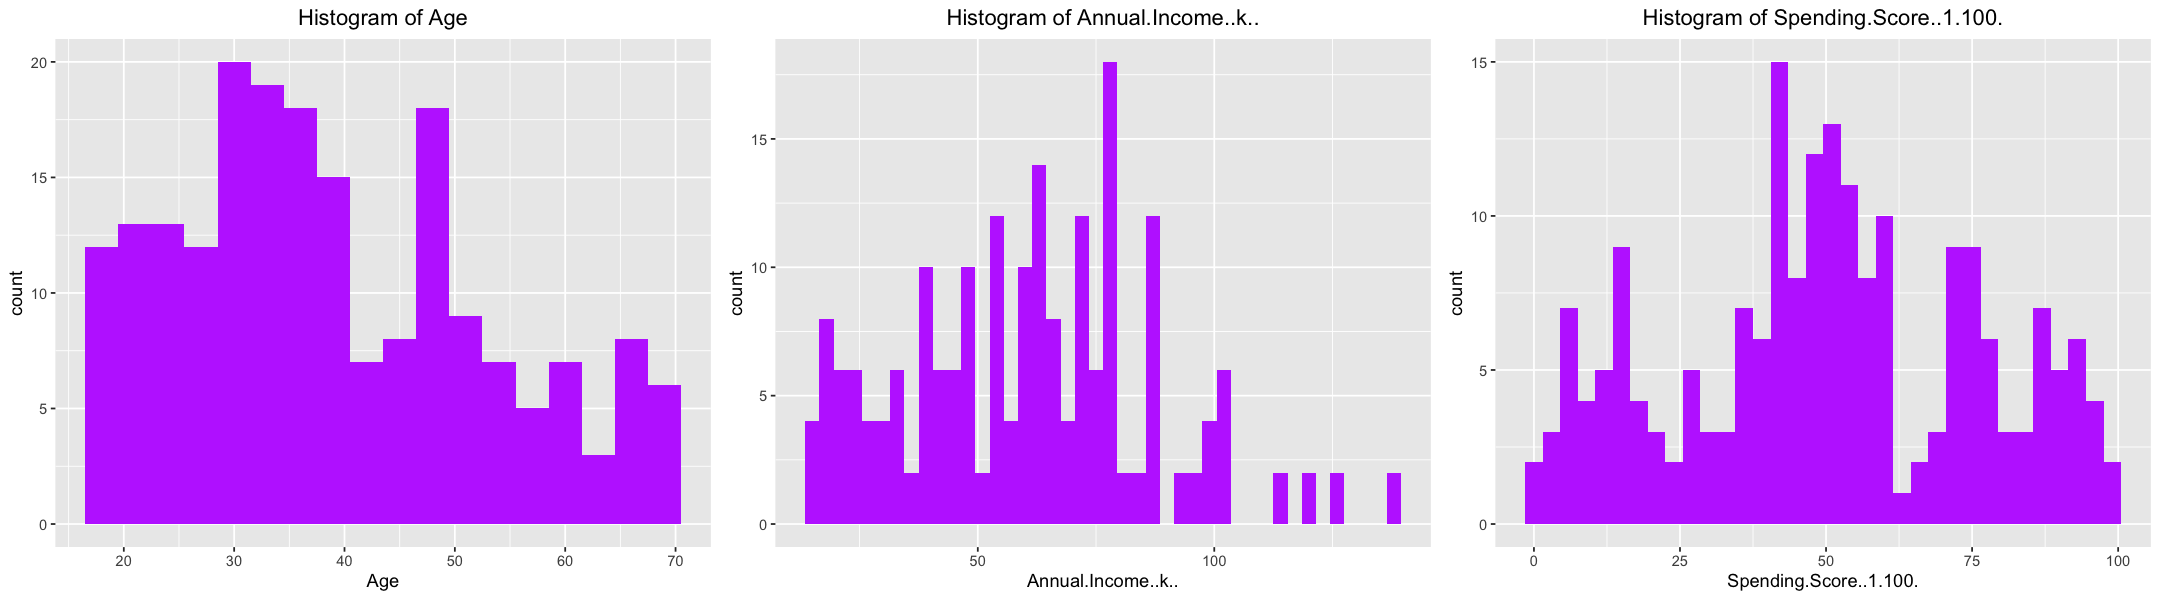

In [59]:
for (i in 3:5) {
    colname <- colnames(df[i])
    assign(paste("his", i, sep = "_"),
    ggplot(df, aes_string(x=colname)) + geom_histogram(fill = "darkorchid1", binwidth=3) +
    ggtitle(paste("Histogram of", colname)) +  theme(plot.title = element_text(hjust = 0.5)))
}

options(repr.plot.width = 18, repr.plot.height = 5)
ggarrange(his_3, his_4, his_5, nrow = 1, ncol = 3)

From the histograms above, we can tell that most of the customers aged young, below 40, fewer customers have very high annual income, and the spending score is ranged from 0 to 100, nearly normal distributed.

### 2. Bi-variate Analysis
#### a) Categorical & Numerical Variable
To examine the relationship between categorical variable and numerical variable, I created box plots.

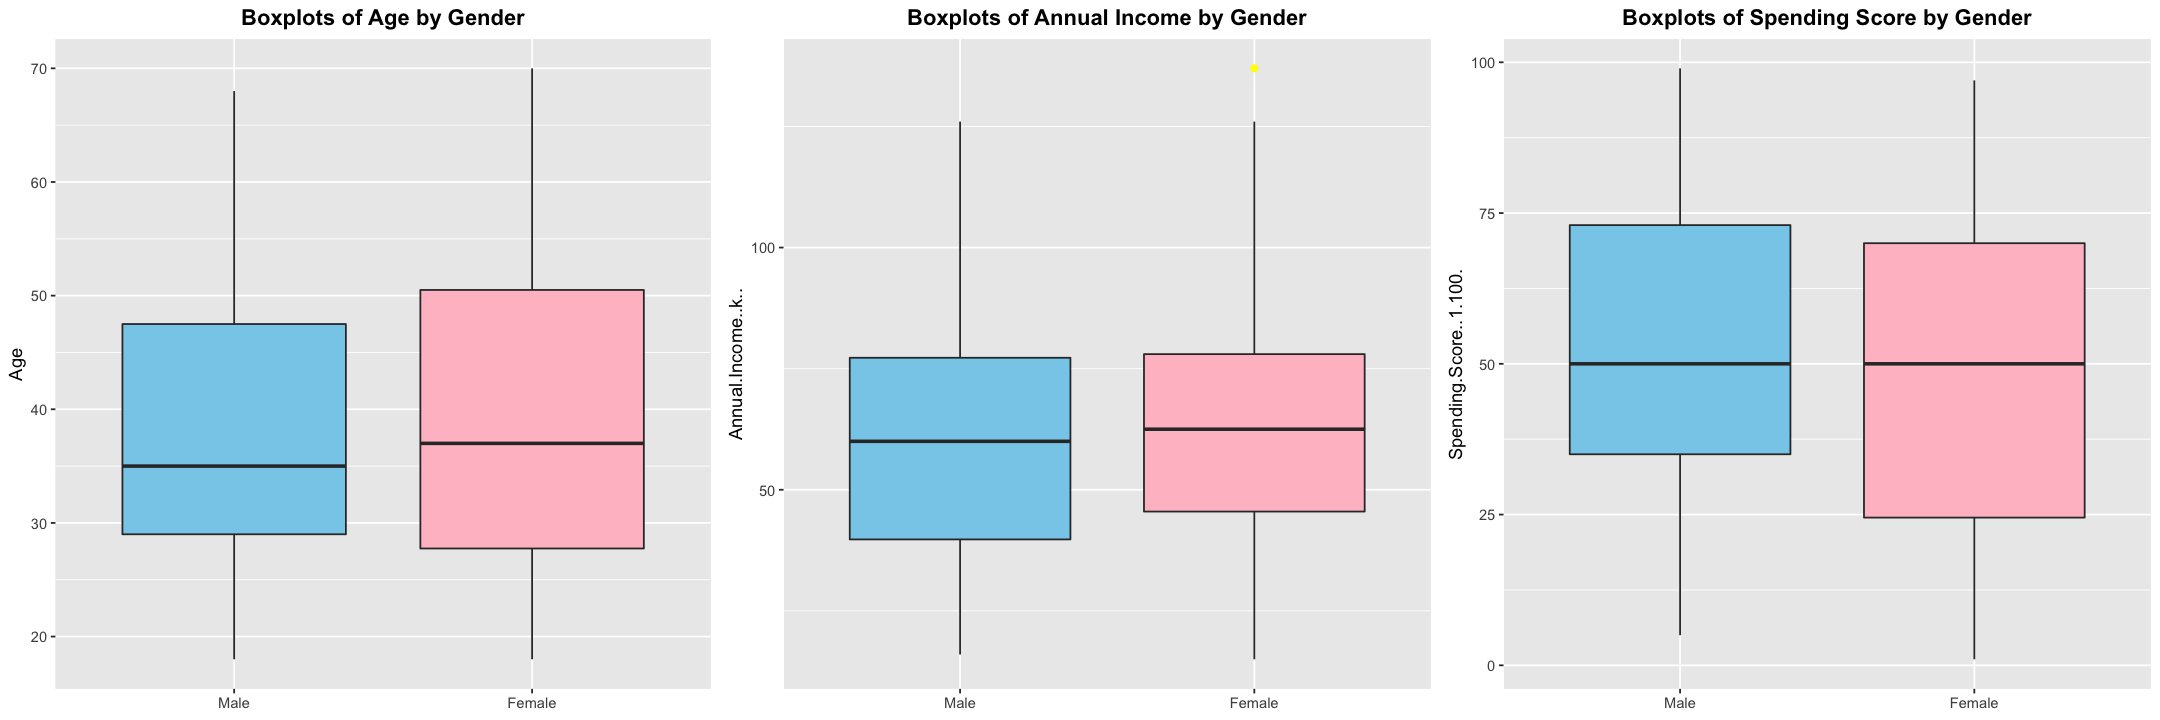

In [60]:
# Create gender label
gender_label <- c("Male", "Female")

# Gender & Age
gender.age_bp <- ggplot(df, aes(y= Age, x = Gender, fill = Gender)) +
  geom_boxplot(outlier.colour = "yellow") + theme(legend.position = "none") + labs(x = NULL) +
  scale_fill_manual(values=c("sky blue","pink")) + scale_x_discrete(labels=gender_label) +
  ggtitle("Boxplots of Age by Gender") + # put main title
  theme(plot.title = element_text(face="bold", hjust = 0.5)) # bold title

# Gender & Annual.Income..k..
gender.incomel_bp <- ggplot(df, aes(y= Annual.Income..k.., x = Gender, fill = Gender)) +
  geom_boxplot(outlier.colour = "yellow") + theme(legend.position = "none") + labs(x = NULL) +
  scale_fill_manual(values=c("sky blue","pink")) + scale_x_discrete(labels=gender_label) +
  ggtitle("Boxplots of Annual Income by Gender") + # put main title
  theme(plot.title = element_text(face="bold", hjust = 0.5)) # bold title

# Gender & Spending.Score..1.100.
gender.score_bp <- ggplot(df, aes(y= Spending.Score..1.100., x = Gender, fill = Gender)) +
  geom_boxplot(outlier.colour = "yellow") + theme(legend.position = "none") + labs(x = NULL) +
  scale_fill_manual(values=c("sky blue","pink")) + scale_x_discrete(labels=gender_label) +
  ggtitle("Boxplots of Spending Score by Gender") + # put main title
  theme(plot.title = element_text(face="bold", hjust = 0.5)) # bold title

options(repr.plot.width = 18, repr.plot.height = 6)
ggarrange(gender.age_bp, gender.incomel_bp, gender.score_bp, nrow = 1, ncol = 3)

The interquartile range (IQR) is a measure of variability. From the boxplots above, we can tell that in terms of age, the IQR of males is shorter than the IQR of females, for annual income, the IQR of males is longer than the IQR of females, and regarding spending score, the IQR of females is longer than the IQR of males and the lowest 25% (Q1) of females is much lower than that of males.
#### b) Numerical & Numerical Variable
To find out the relationship between two numerical variables, we can draw a scatter plot. The relationship can be linear or non-linear and the strength of that relationship can be find using correlation. 

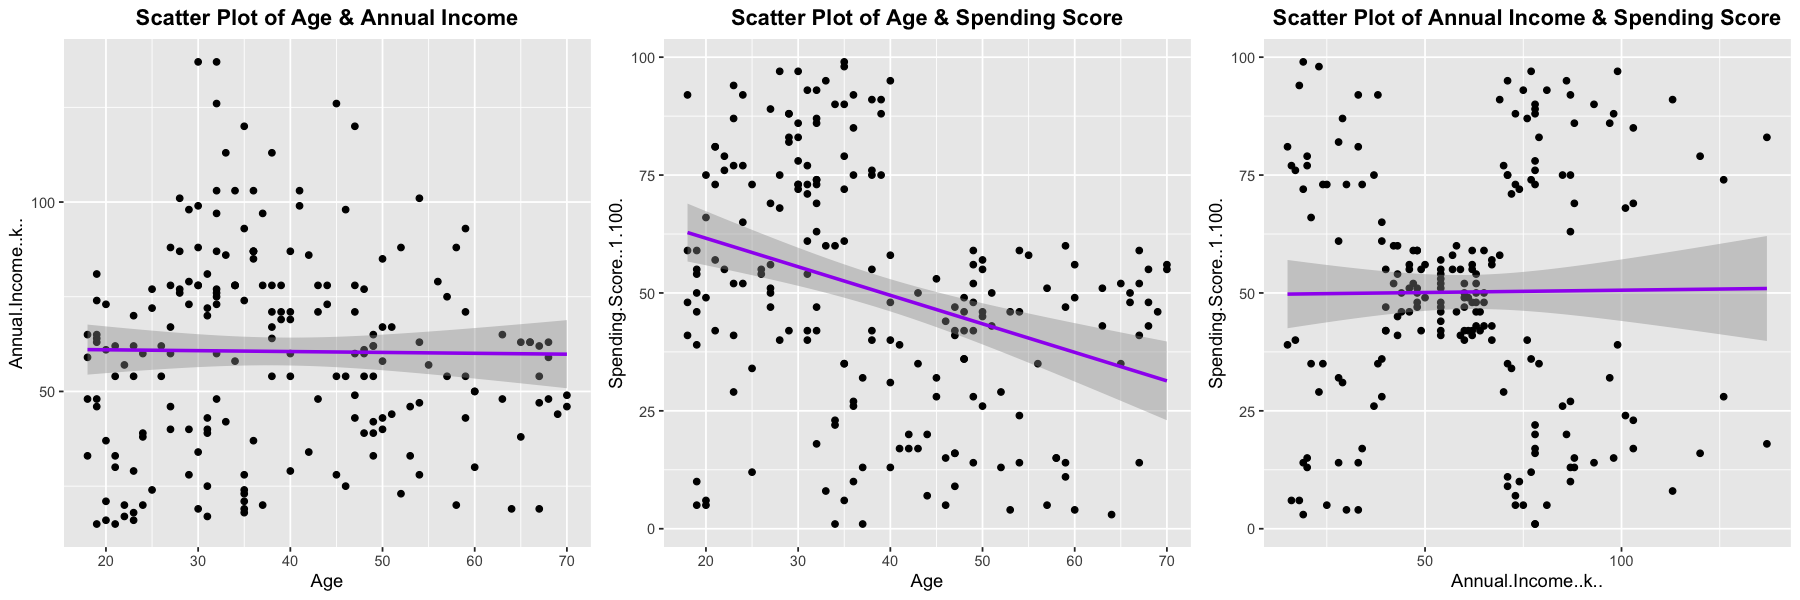

In [61]:
age.income_sp <- ggplot(df, aes(x=Age, y=Annual.Income..k..)) + geom_point() +
  ggtitle("Scatter Plot of Age & Annual Income") + # put main title
  theme(plot.title = element_text(face="bold", hjust = 0.5)) + # bold title
  geom_smooth(method=lm, color="purple")

age.score_sp <- ggplot(df, aes(x=Age, y=Spending.Score..1.100.)) + geom_point() +
  ggtitle("Scatter Plot of Age & Spending Score") + # put main title
  theme(plot.title = element_text(face="bold", hjust = 0.5)) + # bold title
  geom_smooth(method=lm, color="purple")

income.score_sp <- ggplot(df, aes(x=Annual.Income..k.., y=Spending.Score..1.100.)) + geom_point() +
  ggtitle("Scatter Plot of Annual Income & Spending Score") + # put main title
  theme(plot.title = element_text(face="bold", hjust = 0.5)) + # bold title
  geom_smooth(method=lm, color="purple")

options(repr.plot.width = 15, repr.plot.height = 5)
ggarrange(age.income_sp, age.score_sp, income.score_sp, nrow = 1, ncol = 3)

From the scatter plots above, I found that there is a negative relationship in the middle graph and there seems to have some clusters in the right graph.

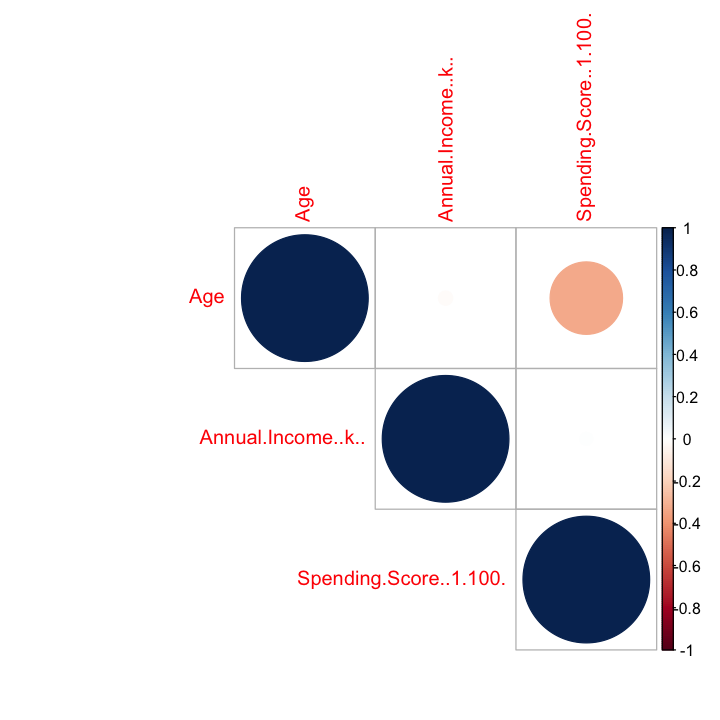

In [62]:
# choose only numerical data (age, annual income, and spending score)
df_cor <- cor(df[3:5])
options(repr.plot.width = 6, repr.plot.height = 6)
corrplot(df_cor, type = "upper")

Also, from the correlation matrix above, I confirmed that there is a negative relationship between age and spending score.

### 3. Missing Value & Outlier Treatment
There is no missing value and from previously analysis, we knew that there is no outlier needed to be treated.

In [63]:
colSums(is.na(df))

CustomerID                 Gender                    Age 
                     0                      0                      0 
    Annual.Income..k.. Spending.Score..1.100. 
                     0                      0

## Data Preprocessing
### 1. Choose Variables
Here I decided to use numerical variables (Age, Annual Income, and Spending Score) to segment customers.

In [64]:
df_clustering <- df[3:5]

### 2. Data Standardization
Clustering algorithms such as K-Means use distance-based measurements to determine the similarity between data points. Since age, annual income, and spending score have different units of measurements, I standardized the data to have a mean of zero and a standard deviation of one.

In [65]:
df_scale <- scale(df_clustering)

In [66]:
summary(df_scale)

      Age          Annual.Income..k.. Spending.Score..1.100.
 Min.   :-1.4926   Min.   :-1.73465   Min.   :-1.905240     
 1st Qu.:-0.7230   1st Qu.:-0.72569   1st Qu.:-0.598292     
 Median :-0.2040   Median : 0.03579   Median :-0.007745     
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.000000     
 3rd Qu.: 0.7266   3rd Qu.: 0.66401   3rd Qu.: 0.882916     
 Max.   : 2.2299   Max.   : 2.91037   Max.   : 1.889750     

## Unsupervised Learning
### 1. K-Means 
K-means is a centroid-based or partition-based clustering algorithm. It partitions all the points in the sample space into K groups of similarity.
#### a) Determining Optimal Clusters (K)
To find the optimal K value, we can use three different methods.
- Method 1: Elbow Method

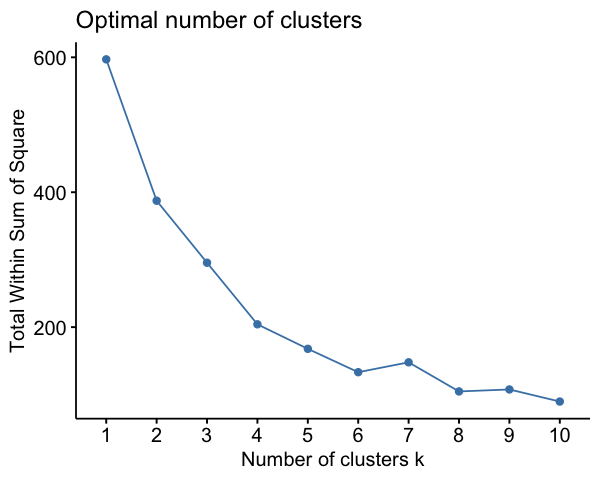

In [67]:
options(repr.plot.width = 5, repr.plot.height = 4)

# Elbow Method
fviz_nbclust(df_scale, kmeans, method = "wss") # knee (elbow): 6

The above result suggested that 6 is the optimal number of clusters, since it appeared to be the bend in the knee.

- Method 2: Average Silhouette Method

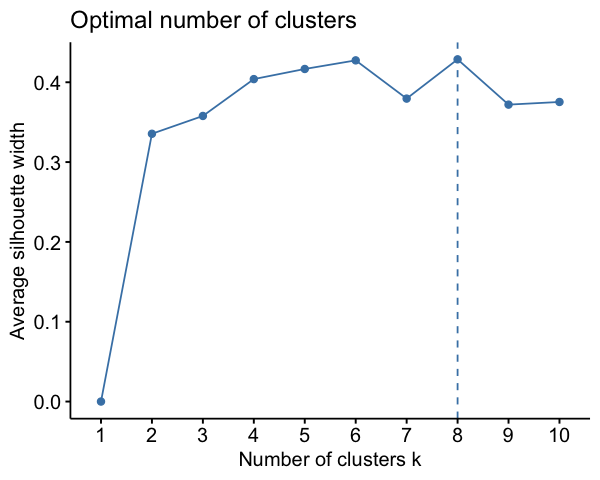

In [68]:
# Average Silhouette Method
fviz_nbclust(df_scale, kmeans, method = "silhouette") # 8

The results above showed that 8 clusters maximize the average silhouette values. That is to say, 8 is an optimal number of clusters.

- Methid 3: Gap Statistic Method

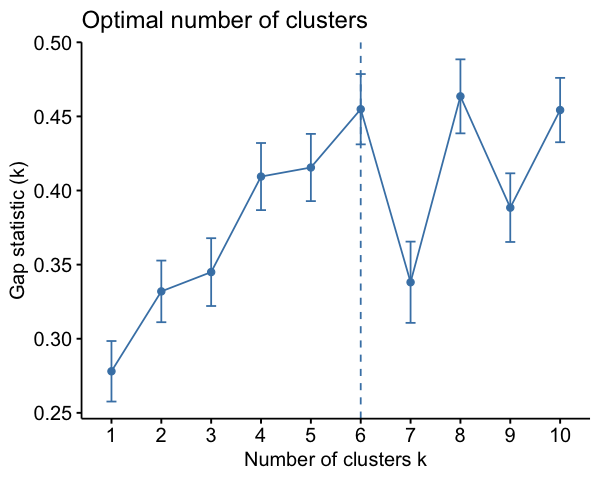

In [69]:
# Gap Statistic Method
fviz_nbclust(df_scale, kmeans, method = "gap_stat") # 6

The result above showed that 6 clusters as the optimal number of clusters.

**Overall, with these approaches suggesting 6 as the number of optimal clusters, I used 6 clusters to perform K-Means clustering.**

#### b) K-Means with 6 Clusters

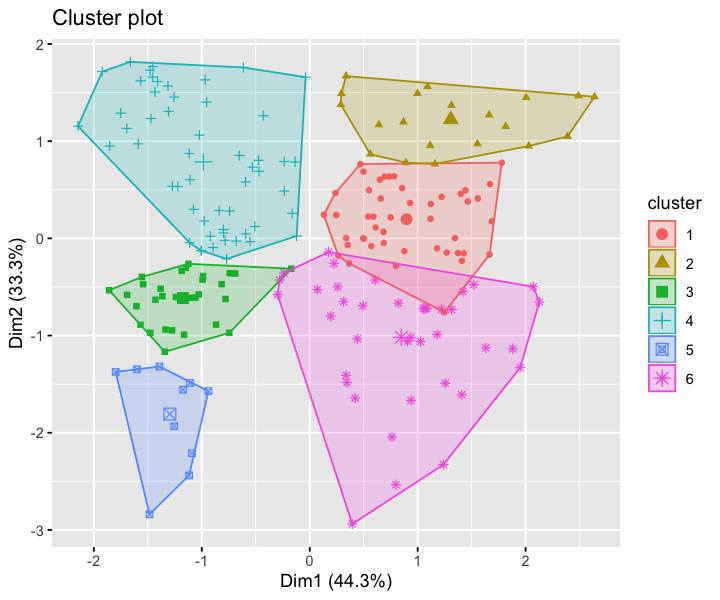

In [70]:
options(repr.plot.width = 6, repr.plot.height = 5)

# Run K-Means using 6 clusters
set.seed(0101)
kmean_6 <- kmeans(df_scale, 6)

# Plot result
fviz_cluster(kmean_6, data=df_scale, geom = "point")

#### c) Plot Clusters
- Annual Income & Spending Score
- Age & Annual Income
- Age & Spending Score

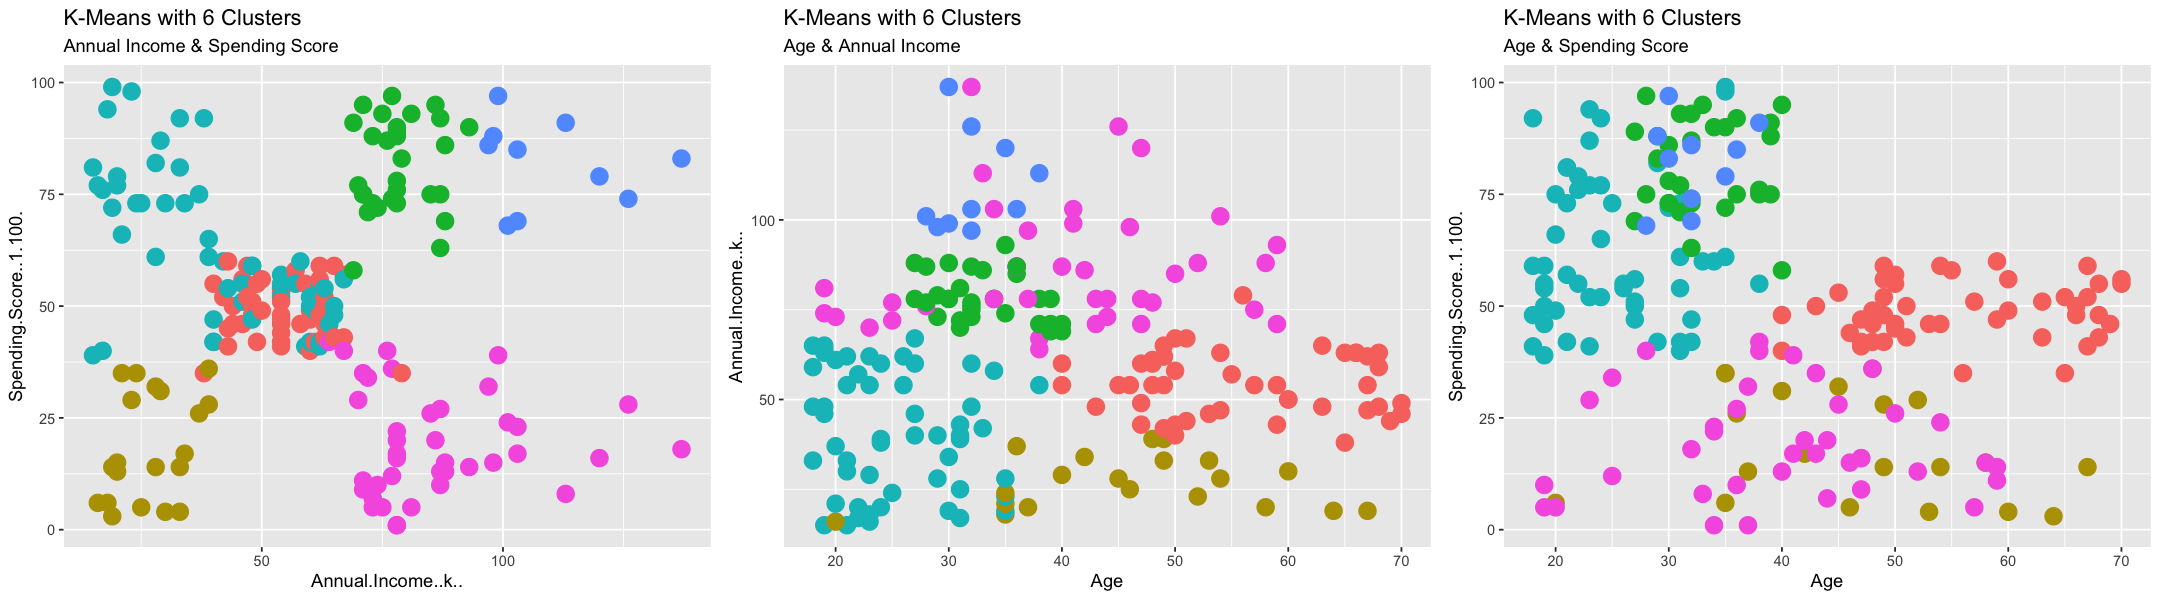

In [86]:
options(repr.plot.width = 18, repr.plot.height = 5)

kmean_income.score <- ggplot(df_clustering, aes(x = Annual.Income..k.., y = Spending.Score..1.100.)) + 
    geom_point(stat = "identity", aes(color = as.factor(kmean_6$cluster), size=1.5)) +
    ggtitle("K-Means with 6 Clusters", subtitle = "Annual Income & Spending Score") + theme(legend.position = "none")

kmean_age.income <- ggplot(df_clustering, aes(x = Age, y = Annual.Income..k..)) + 
    geom_point(stat = "identity", aes(color = as.factor(kmean_6$cluster), size=0.5)) +
    ggtitle("K-Means with 6 Clusters", subtitle = "Age & Annual Income") + theme(legend.position = "none")

kmean_age.score <- ggplot(df_clustering, aes(x = Age, y = Spending.Score..1.100.)) + 
    geom_point(stat = "identity", aes(color = as.factor(kmean_6$cluster), size=0.5)) +
    ggtitle("K-Means with 6 Clusters", subtitle = "Age & Spending Score") + theme(legend.position = "none")

ggarrange(kmean_income.score, kmean_age.income, kmean_age.score, nrow = 1, ncol = 3)

In [72]:
table(kmean_6$cluster)


 1  2  3  4  5  6 
47 20 30 54 10 39 

From the results above, we can see there are 6 groups of customers and the groups could be described as:
1. Red: <strong>older</strong>, <strong>middle</strong> annual income and <strong>middle</strong> spending score
2. Beige: <strong>low</strong> annual income and <strong>low</strong> spending score
3. Green: <strong>upper-middle</strong> annual income and <strong>high</strong> spending score
4. Green Lake: <strong>younger</strong>, <strong>low</strong> annual income but <strong>upper middle to high</strong> spending score
5. Blue: <strong>high</strong> annual income and <strong>high</strong> spending score
6. Barbie Pink: <strong>upper-middle to high</strong> annual icome but <strong>low</strong> spending score

Overall, I found that six clusters can group customers based on annual income and speneding score, since they are almost well separated in the chart. In terms of age, clusters mainly split customers who have middle annual income and middle spending score into olders (Red group 1) and youngers (Green Lake group 4). 

#### d) 3D Scatter Plot

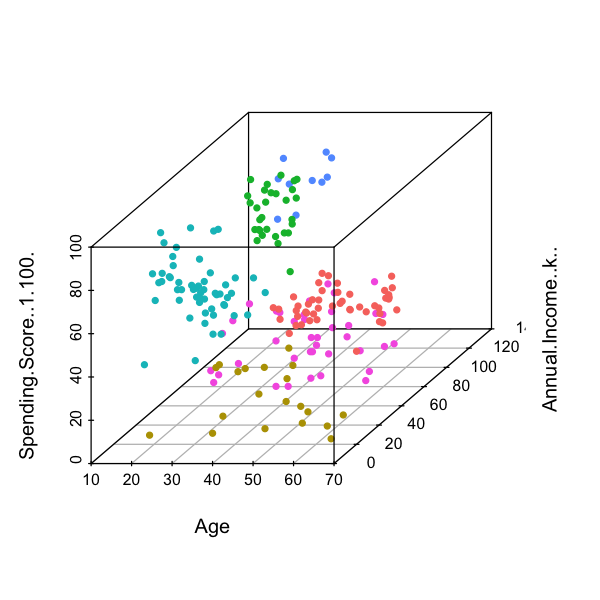

In [73]:
options(repr.plot.width = 5, repr.plot.height = 5)

# Assign same colors with ggplot 
colors <- c("#F8766D", "#B79F00", "#00BA38", "#00BFC4", "#619CFF", "#F564E3")
colors <- colors[as.numeric(kmean_6$cluster)]
scatterplot3d(df_clustering, pch=20, color=colors,)

### 2. DBScan
DBScan (Density Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm. The key fact of this algorithm is that the neighbourhood of each point in a cluster, which is within a given radius (eps), must have a minimum number of points (minPts). Besides, DBScan has proved extremely efficient in detecting outliers and handling noise.
#### a) Find Optimal eps
I set minPts=4 to find a knee (eps/radius). A knee corresponds to a threshold where a sharp change occurs along the k-distance curve. Note the higher the eps is, the more elements will be included in the particular group, and the less density of this group will be.

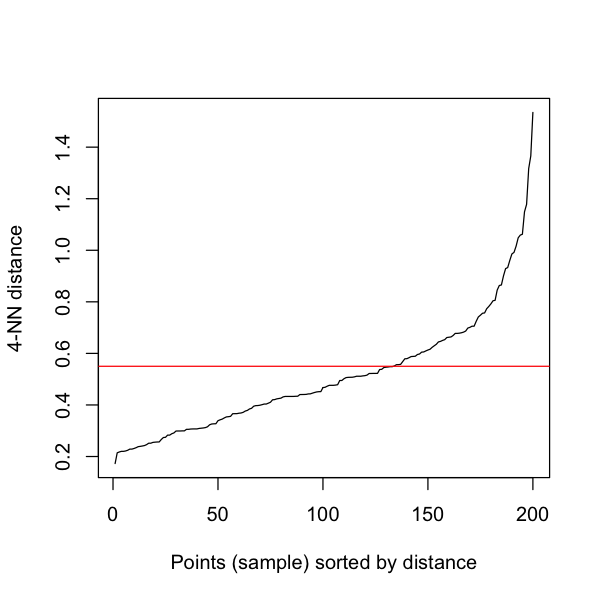

In [74]:
# Find a knee 
kNNdistplot(df_scale, k=4) # minPts=4
abline(h=0.55, col="red")

#### b) Set eps = 0.55, minPts = 4

In [75]:
df_dbscan <- dbscan(df_scale, eps = 0.55, MinPts = 4)

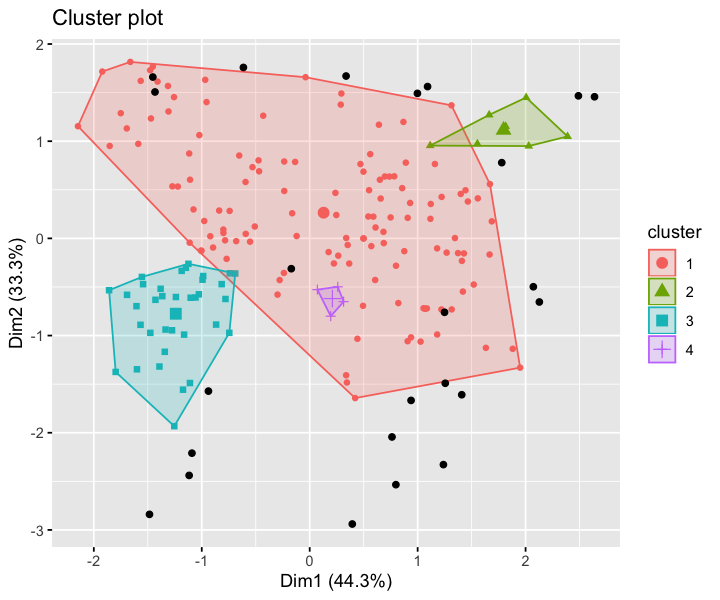

In [76]:
options(repr.plot.width = 6, repr.plot.height = 5)
fviz_cluster(df_dbscan, data=df_scale, geom = "point")

In [77]:
table(df_dbscan$cluster)


  0   1   2   3   4 
 24 130   7  35   4 

From the results above, we can see that DBScan created 4 clusters plus outliers cluster. The sizes of clusters vary significantly, from only 4 observations to 130 observations. Also, 24 outliers (noises) were marked as black points. 
#### c) Plot Clusters
- Annual Income & Spending Score
- Age & Annual Income
- Age & Spending Score

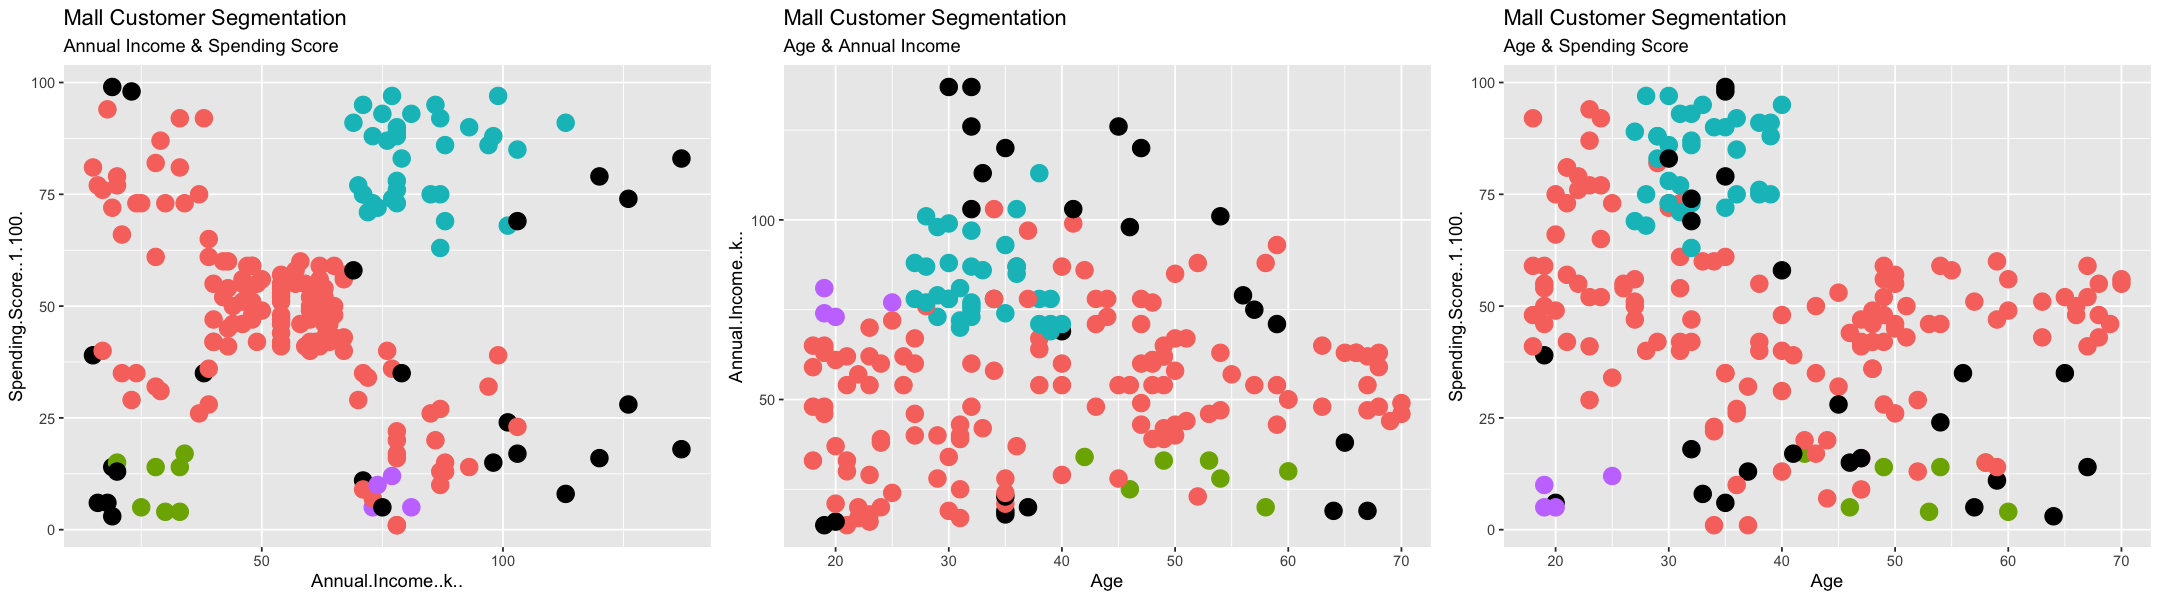

In [96]:
# Assign same colors with ggplot 
df_dbscan$color[df_dbscan$cluster == 0] <- "#000000"
df_dbscan$color[df_dbscan$cluster == 1] <- "#F8766D"
df_dbscan$color[df_dbscan$cluster == 2] <- "#7CAE00"
df_dbscan$color[df_dbscan$cluster == 3] <- "#00BFC4"
df_dbscan$color[df_dbscan$cluster == 4] <- "#C77CFF"

options(repr.plot.width = 18, repr.plot.height = 5)

dbscan_income.score <- ggplot(df_clustering, aes(x = Annual.Income..k.., y = Spending.Score..1.100.)) + 
    geom_point(stat = "identity", color = df_dbscan$color, aes(size=1.5)) +
    ggtitle("Mall Customer Segmentation", subtitle = "Annual Income & Spending Score") + theme(legend.position = "none")

dbscan_age.income <- ggplot(df_clustering, aes(x = Age, y = Annual.Income..k..)) + 
    geom_point(stat = "identity", color = df_dbscan$color, aes(size=0.5)) +
    ggtitle("Mall Customer Segmentation", subtitle = "Age & Annual Income") + theme(legend.position = "none")

dbscan_age.score <- ggplot(df_clustering, aes(x = Age, y = Spending.Score..1.100.)) + 
    geom_point(stat = "identity", color = df_dbscan$color, aes(size=0.5)) +
    ggtitle("Mall Customer Segmentation", subtitle = "Age & Spending Score") + theme(legend.position = "none")

ggarrange(dbscan_income.score, dbscan_age.income, dbscan_age.score, nrow = 1, ncol = 3)

From the results above, we can see there are 4 groups of customers and the groups could be described as:
1. Red: hardly to describe specifically.
2. Light Green: <strong>low</strong> annual income and <strong>low</strong> spending score.
3. Green Lake: <strong>upper-middle to high</strong> annual income and <strong>high</strong> spending score.
4. Purple: <strong>younger</strong>, <strong>upper-middle</strong> annual income but <strong>low</strong> spending score.

Overall, in our case, K-Means performed better than DBScan.

## Conclusion
To sum up, being able to determine different segments of customers can help the marketing team approach those customer segments in unique ways. For example, based on customer clustering analysis of K-Means, I could give three data-driven recommendations. 
1. <strong>Blue</strong> (Target customers, High annual income and High spending score): the mall can give them some special services, showing their importances to retain them as they give the most profit margin. 
2. <strong>Beige</strong> (Low annual income and Low spending score): the mall can send them extra offers or discounts to attract them towards spending. 
3. <strong>Barbie Pink</strong> (Upper Middle to High annual income but Low spending score): the mall can investigate those customers in-detail to find whether they are unsatisfied or unhappy with the mall’s services. Then, if the mall can solve the problems, those customers can then become higher spenders, as they have the potential to spend more money. 

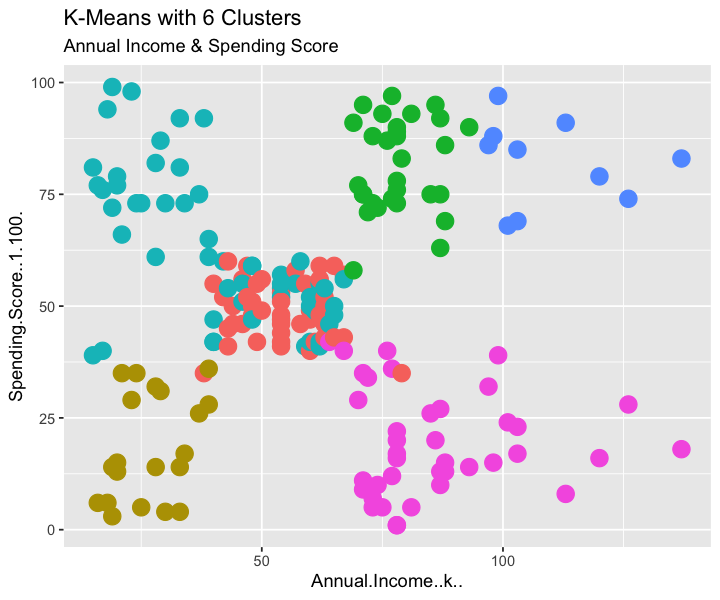

In [87]:
options(repr.plot.width = 6, repr.plot.height = 5)
kmean_income.score

## References
Dabbura, I. (2018, September 17). <em>K-means Clustering: Algorithm, Applications, Evaluation Methods, and Drawbacks</em>. Retrieved from https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a <br />
GeeksforGeeks. (2020, August 20). Retrieved from https://www.geeksforgeeks.org/difference-between-k-means-and-dbscan-clustering/ <br />
Kaushik, S. (2016, November 3). <em>An Introduction to Clustering and different methods of clustering</em>. Retrieved from https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/ <br />
Mitra, D. (2020, January 13). <em>Customer-segmentation for differentiated targeting in marketing using clustering analysis</em>. Retrieved from https://medium.com/analytics-vidhya/customer-segmentation-for-differentiated-targeting-in-marketing-using-clustering-analysis-3ed0b883c18b <br />
Yagcioglu, S. (2020, May 18). <em>Classical Examples of Supervised vs. Unsupervised Learning in Machine Learning</em>. Retrieved from https://www.springboard.com/blog/lp-machine-learning-unsupervised-learning-supervised-learning/